In [1]:
import os
import torch
import torch.nn as nn
import torchvision as tv
import torchio as tio
import numpy as np
from torchsummary import summary
import matplotlib.pyplot as plt
import _01_dataloader_small as prl_dl
import _02_autoencoder as prl_ae
import _05_predictor as prl_pred

#import importlib
#importlib.reload(prl_dl)
#importlib.reload(prl_ae)
#importlib.reload(prl_pred)

In [9]:
def patch_to_tensor(patch):
    patch_list = [patch.get(key)["data"] for key in keys]
    #for i in range(len(patch_list)):
     #   patch_list[i] = patch_list[i][None, :]
    patch_tensor = torch.cat(patch_list, dim=0)
    return patch_tensor[None, :]

def plot_3d_tensor(subject = 0, coord = [10, 10, 10]):
    patch = prl_dl.train_loader.dataset[subject]
    
    tensor1 = patch_to_tensor(patch)
    tensor2 = prl_autoencoder(tensor1)
    
    for image in range(4):
        # Plot first tensor
        tensor1_tmp = tensor1[0, image, :, :, :]

        # Extract the slice at the given coordinate
        slice_x = tensor1_tmp[coord[0], :, :].detach().numpy()
        slice_y = tensor1_tmp[:, coord[1], :].detach().numpy()
        slice_z = tensor1_tmp[:, :, coord[2]].detach().numpy()

        # Create subplots for the three axes
        fig, axes = plt.subplots(1, 3, figsize=(12, 4))

        # Plot slices in each axis
        axes[0].imshow(slice_x, cmap='gray')
        axes[0].set_title('X-axis Slice')

        axes[1].imshow(slice_y, cmap='gray')
        axes[1].set_title('Y-axis Slice')

        axes[2].imshow(slice_z, cmap='gray')
        axes[2].set_title('Z-axis Slice')

        # Adjust spacing between subplots
        plt.tight_layout()

        # Display the plot
        plt.show()
        plt.clf()

        # Plot second tensor
        tensor2_tmp = tensor2[0, image, :, :, :]
        
        # Extract the slice at the given coordinate
        slice_x = tensor2_tmp[coord[0], :, :].detach().numpy()
        slice_y = tensor2_tmp[:, coord[1], :].detach().numpy()
        slice_z = tensor2_tmp[:, :, coord[2]].detach().numpy()

        # Create subplots for the three axes
        fig, axes = plt.subplots(1, 3, figsize=(12, 4))

        # Plot slices in each axis
        axes[0].imshow(slice_x, cmap='gray')
        axes[0].set_title('X-axis Slice')

        axes[1].imshow(slice_y, cmap='gray')
        axes[1].set_title('Y-axis Slice')

        axes[2].imshow(slice_z, cmap='gray')
        axes[2].set_title('Z-axis Slice')

        # Adjust spacing between subplots
        plt.tight_layout()

        # Display the plot
        plt.show()
        plt.clf()

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
prl_autoencoder = prl_ae.Autoencoder3D()
prl_autoencoder = prl_autoencoder.to(device)

prl_predictor = prl_pred.Predictor3D()
prl_predictor = prl_predictor.to(device)

keys = ["t1", "flair", "epi", "phase"]

cpu


In [12]:
model_path = "/home/fengling/Documents/prl/prl_pytorch/cv_models/prl_autoencoder_2.pt"

# Load the saved model
checkpoint = torch.load(model_path, map_location=torch.device('cpu'))

# Load the state_dict from the checkpoint
prl_autoencoder.load_state_dict(checkpoint)

# Set the model to evaluation mode
prl_autoencoder.eval()

Autoencoder3D(
  (encoder): Sequential(
    (0): Conv3d(4, 16, kernel_size=(7, 7, 7), stride=(1, 1, 1), padding=(3, 3, 3))
    (1): BatchNorm3d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv3d(16, 32, kernel_size=(5, 5, 5), stride=(1, 1, 1), padding=(2, 2, 2))
    (4): BatchNorm3d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Conv3d(32, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    (7): MaxPool3d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU()
    (10): Conv3d(64, 256, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    (11): MaxPool3d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): BatchNorm3d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): ReLU()
    (14): Conv3d(256, 1024, ker

In [13]:
patches_batch = next(iter(prl_dl.train_loader))

In [14]:
keys = ["t1", "flair", "epi", "phase"]
input_tensor = torch.cat([patches_batch.get(key)["data"] for key in keys], dim=1)

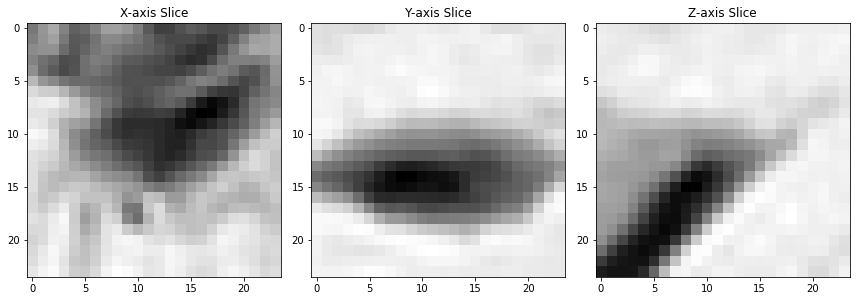

<Figure size 432x288 with 0 Axes>

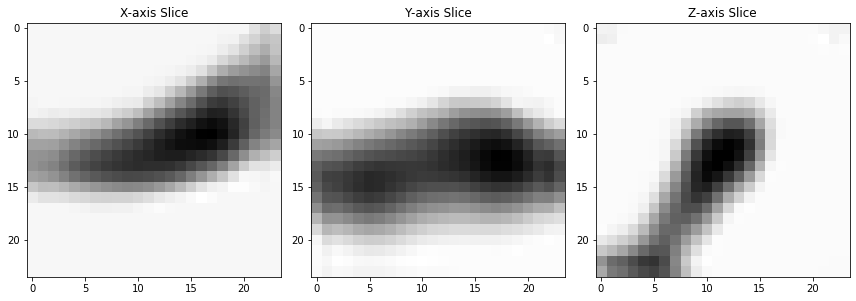

<Figure size 432x288 with 0 Axes>

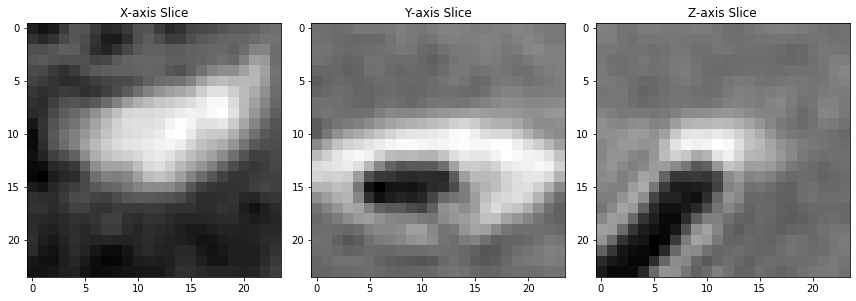

<Figure size 432x288 with 0 Axes>

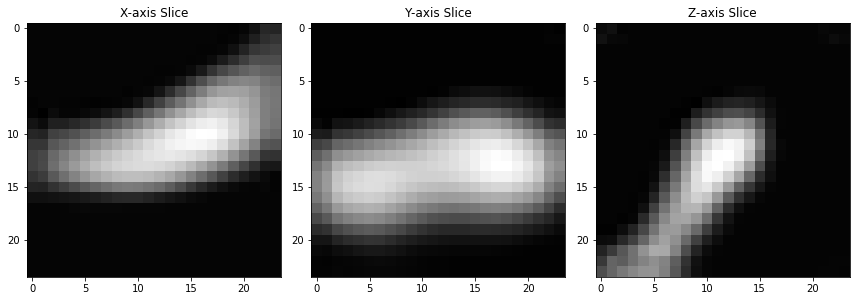

<Figure size 432x288 with 0 Axes>

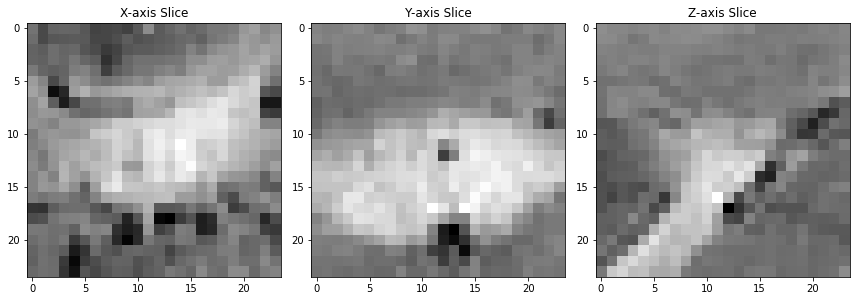

<Figure size 432x288 with 0 Axes>

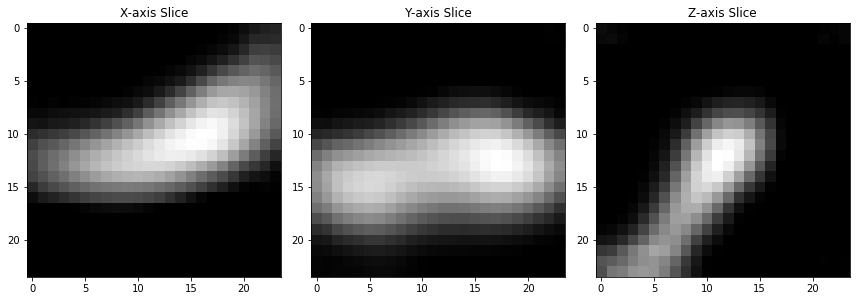

<Figure size 432x288 with 0 Axes>

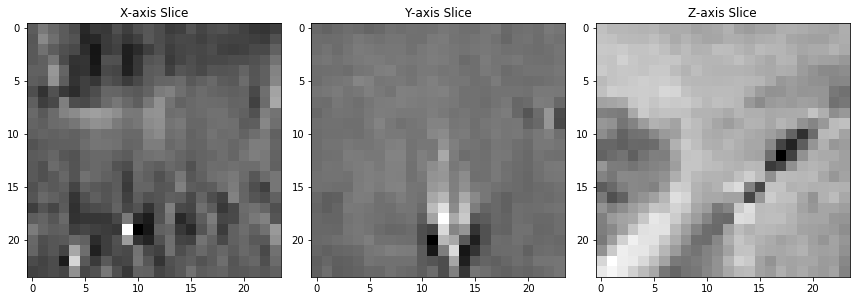

<Figure size 432x288 with 0 Axes>

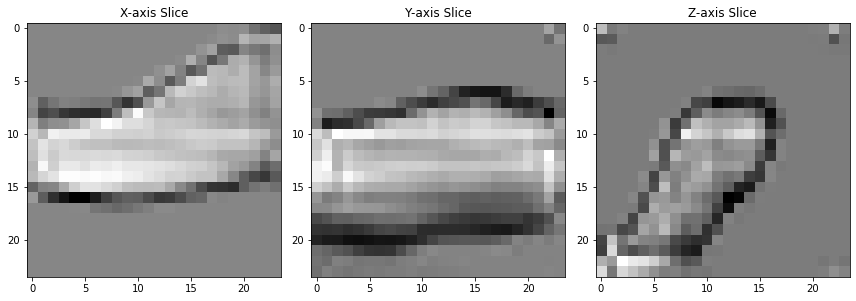

<Figure size 432x288 with 0 Axes>

In [15]:
plot_3d_tensor(subject = 1)